In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

In [ ]:
data = pd.read_csv('dc_combined.csv')

In [ ]:
def remove_attack_and_seq_labels(data):
    X =  data.loc[:,~data.columns.str.startswith('Atk')]
    X =  X.loc[:,~X.columns.str.startswith('Attack')]
    X =  X.loc[:,~X.columns.str.startswith('Label_')]
    X = X.drop(['Label', 'Seq'], axis=1)
    return X

In [ ]:
X = remove_attack_and_seq_labels(data)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215675 entries, 0 to 1215674
Data columns (total 77 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Dur              1215675 non-null  float64
 1   RunTime          1215675 non-null  float64
 2   Mean             1215675 non-null  float64
 3   Sum              1215675 non-null  float64
 4   Min              1215675 non-null  float64
 5   Max              1215675 non-null  float64
 6   sTos             1215675 non-null  float64
 7   dTos             1215675 non-null  float64
 8   sTtl             1215675 non-null  float64
 9   dTtl             1215675 non-null  float64
 10  sHops            1215675 non-null  float64
 11  dHops            1215675 non-null  float64
 12  TotPkts          1215675 non-null  int64  
 13  SrcPkts          1215675 non-null  int64  
 14  DstPkts          1215675 non-null  int64  
 15  TotBytes         1215675 non-null  int64  
 16  SrcBytes         1

In [ ]:
def label_encoder(data, column_name):
  Y = data[column_name]
  label_encoder = LabelEncoder()
  y_encoded = label_encoder.fit_transform(Y)
  return y_encoded

In [ ]:
Y = label_encoder(data, 'Label')

In [ ]:
def mutual_info(X, Y):
  mutual_info_arr = mutual_info_classif(X, Y)
  series_info = pd.Series(mutual_info_arr)
  series_info.index = X.columns
  series_top = series_info.sort_values(ascending=False)[:20]
  return series_top

In [ ]:
result = mutual_info(X, Y)

<Axes: >

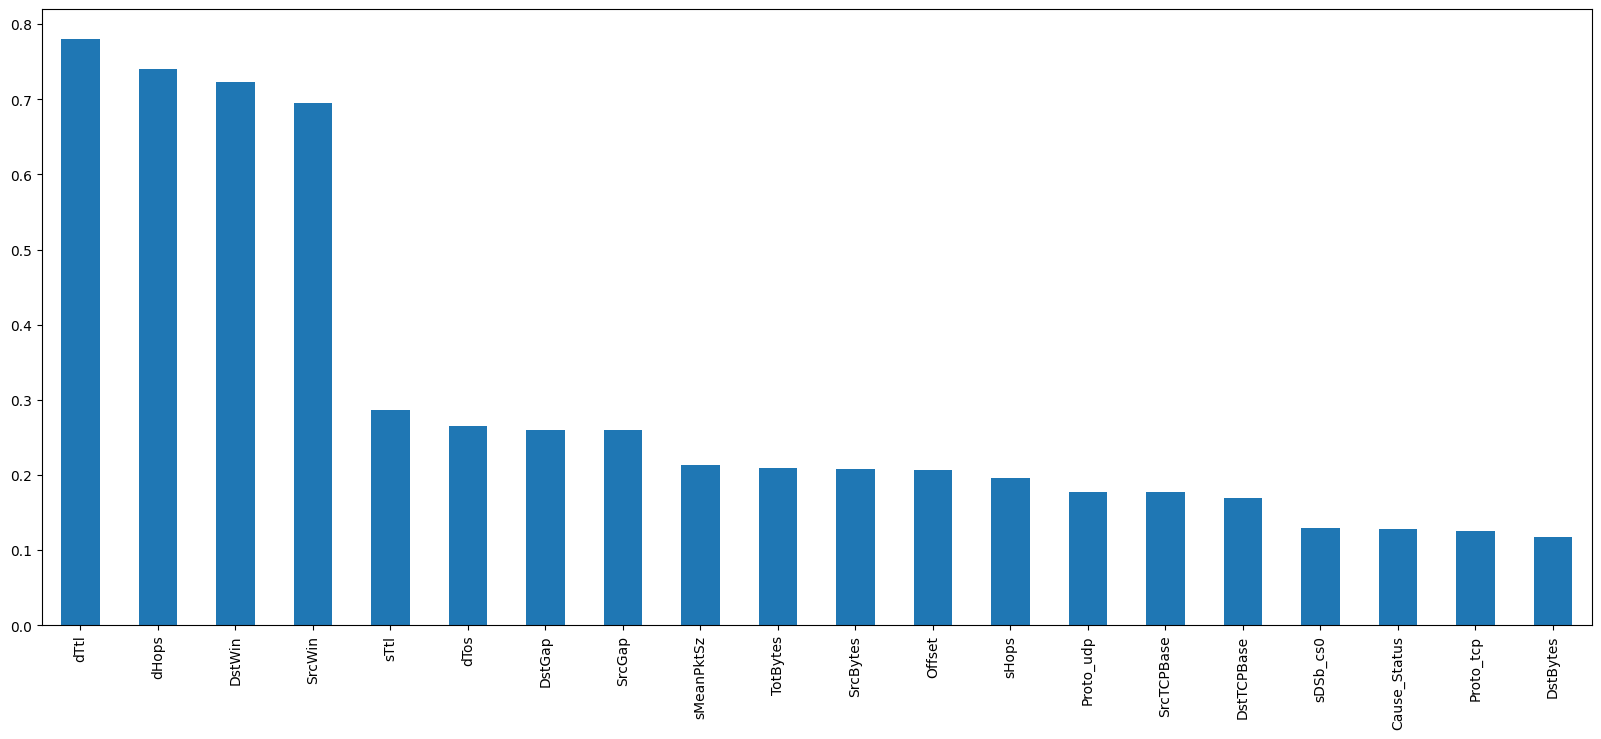

In [ ]:
result.plot.bar(figsize=(20,8))

In [ ]:
new_data = data[result.keys()]

In [ ]:
new_data

,dTtl,dHops,DstWin,SrcWin,sTtl,dTos,DstGap,SrcGap,sMeanPktSz,TotBytes,SrcBytes,Offset,sHops,Proto_udp,SrcTCPBase,DstTCPBase,sDSb_cs0,Cause_Status,Proto_tcp,DstBytes
0,64.0,0.0,74432.548869,915681.012054,58.0,0.0,0.0,0.0,98.000000,98,98,128,6.0,0,2.044248e+09,2.145664e+09,1,0,0,0
1,64.0,0.0,74432.548869,915681.012054,58.0,0.0,0.0,0.0,98.000000,98,98,232,6.0,0,2.044248e+09,2.145664e+09,1,0,0,0
2,64.0,0.0,74432.548869,915681.012054,117.0,0.0,0.0,0.0,1245.979614,249093,244212,336,11.0,1,2.044248e+09,2.145664e+09,1,0,0,4881
3,64.0,0.0,74432.548869,915681.012054,117.0,0.0,0.0,0.0,1326.656494,221712,216245,440,11.0,1,2.044248e+09,2.145664e+09,1,0,0,5467
4,64.0,0.0,74432.548869,915681.012054,117.0,0.0,0.0,0.0,1351.583374,280216,275723,544,11.0,1,2.044248e+09,2.145664e+09,1,0,0,4493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215670,255.0,1.0,74432.928519,915740.586960,252.0,186.0,0.0,0.0,102.000000,200,102,190300,4.0,0,2.044248e+09,2.145664e+09,0,1,0,98
1215671,250.0,6.0,74432.907511,915737.284844,255.0,40.0,0.0,0.0,96.666664,3056,290,190392,1.0,0,2.044248e+09,2.145664e+09,0,1,0,2766
1215672,114.0,14.0,273.000000,213.000000,64.0,0.0,0.0,0.0,80.000000,252,160,190496,0.0,0,2.237373e+09,1.983280e+09,1,0,1,92
1215673,250.0,6.0,74432.907511,915737.284844,255.0,40.0,0.0,0.0,102.000000,596,306,190704,1.0,0,2.044248e+09,2.145664e+09,0,1,0,290


In [ ]:
def min_max_normalisation(X):
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler(feature_range=(-1, 1))
  scaled_data = scaler.fit_transform(X)
  return scaled_data

In [ ]:
def std_normalisation(data):
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(data)
  return scaled_data

In [ ]:
def get_pca_df(scaled_data, no_of_components):
  from sklearn.decomposition import PCA
  pca = PCA(n_components=no_of_components)
  Principal_components=pca.fit_transform(scaled_data)
  column_names = ["PC "+str(i) for i in range(1, no_of_components+1)]
  pca_df = pd.DataFrame(data = Principal_components, columns = column_names)
  return pca_df

In [ ]:
# Choose this or the next one to run
normalised_data = std_normalisation(new_data)

In [ ]:
normalised_data = min_max_normalisation(new_data)

In [ ]:
normalised_data

array([[-0.75229358, -1.        , -0.99112681, ..., -1.        ,
        -1.        , -1.        ],
       [-0.75229358, -1.        , -0.99112681, ..., -1.        ,
        -1.        , -1.        ],
       [-0.75229358, -1.        , -0.99112681, ..., -1.        ,
        -1.        , -0.9978553 ],
       ...,
       [-0.29357798, -0.44      , -0.99996746, ..., -1.        ,
         1.        , -0.99995958],
       [ 0.95412844, -0.76      , -0.99112677, ...,  1.        ,
        -1.        , -0.99987257],
       [ 1.        , -0.96      , -0.99112677, ...,  1.        ,
        -1.        , -0.99991564]])

In [ ]:
pca_data = get_pca_df(normalised_data, 15)

In [ ]:
pca_data

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
0,1.169525,1.014373,-0.314783,-0.291218,0.085691,1.153004,-0.056092,-0.000454,-0.284621,-0.605265,-0.010744,0.013258,-0.025678,-0.013251,-0.005157
1,1.169524,1.014371,-0.314785,-0.291213,0.085691,1.153004,-0.056092,-0.000454,-0.284621,-0.605265,-0.010744,0.013258,-0.025678,-0.013250,-0.005157
2,-0.198817,1.558993,0.318096,-0.400488,0.195097,0.256334,0.014755,1.157297,1.131976,-0.118713,0.030462,-0.060594,-0.081952,-0.079765,0.093095
3,-0.198204,1.559766,0.326553,-0.405351,0.201372,0.270198,0.015205,1.206533,1.217176,-0.137120,0.030466,-0.059217,-0.079642,-0.069935,0.033972
4,-0.198190,1.559900,0.330676,-0.407802,0.204620,0.276424,0.015441,1.231006,1.256798,-0.145604,0.030893,-0.063349,-0.087662,-0.084040,0.117532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215670,0.596082,-0.315919,2.179224,0.385293,0.066903,2.585625,-0.152678,-1.381095,0.554683,1.530179,0.018406,0.087697,-0.467888,0.130014,-0.000982
1215671,0.599556,-0.334249,2.079612,0.352283,0.007829,2.157697,-0.132302,-1.295806,0.466497,0.855934,-0.018870,-0.024091,0.762973,-0.465866,-0.007676
1215672,2.462622,0.532056,-0.257696,-0.050366,-0.163384,-0.024895,-0.087184,-0.226917,0.229213,0.239471,-0.080825,0.468676,0.228599,-0.072260,0.030227
1215673,0.599588,-0.334203,2.080201,0.351953,0.008277,2.158661,-0.132270,-1.292323,0.472448,0.854646,-0.018858,-0.024168,0.762872,-0.465607,-0.009195


In [ ]:
def concat_column_for_plot(pca_data, column_name):
  for_plot = pd.concat([pca_data, data[column_name]], axis = 1)
  return for_plot

In [ ]:
pca_with_label = concat_column_for_plot(pca_data, "Label")

In [ ]:
pca_with_label

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15,Label
0,1.169525,1.014373,-0.314783,-0.291218,0.085691,1.153004,-0.056092,-0.000454,-0.284621,-0.605265,-0.010744,0.013258,-0.025678,-0.013251,-0.005157,Benign
1,1.169524,1.014371,-0.314785,-0.291213,0.085691,1.153004,-0.056092,-0.000454,-0.284621,-0.605265,-0.010744,0.013258,-0.025678,-0.013250,-0.005157,Benign
2,-0.198817,1.558993,0.318096,-0.400488,0.195097,0.256334,0.014755,1.157297,1.131976,-0.118713,0.030462,-0.060594,-0.081952,-0.079765,0.093095,Benign
3,-0.198204,1.559766,0.326553,-0.405351,0.201372,0.270198,0.015205,1.206533,1.217176,-0.137120,0.030466,-0.059217,-0.079642,-0.069935,0.033972,Benign
4,-0.198190,1.559900,0.330676,-0.407802,0.204620,0.276424,0.015441,1.231006,1.256798,-0.145604,0.030893,-0.063349,-0.087662,-0.084040,0.117532,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215670,0.596082,-0.315919,2.179224,0.385293,0.066903,2.585625,-0.152678,-1.381095,0.554683,1.530179,0.018406,0.087697,-0.467888,0.130014,-0.000982,Benign
1215671,0.599556,-0.334249,2.079612,0.352283,0.007829,2.157697,-0.132302,-1.295806,0.466497,0.855934,-0.018870,-0.024091,0.762973,-0.465866,-0.007676,Benign
1215672,2.462622,0.532056,-0.257696,-0.050366,-0.163384,-0.024895,-0.087184,-0.226917,0.229213,0.239471,-0.080825,0.468676,0.228599,-0.072260,0.030227,Benign
1215673,0.599588,-0.334203,2.080201,0.351953,0.008277,2.158661,-0.132270,-1.292323,0.472448,0.854646,-0.018858,-0.024168,0.762872,-0.465607,-0.009195,Benign


In [ ]:
def binary_plot(pca_with_label):
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1)
  ax.set_xlabel('PC 3', fontsize = 15)
  ax.set_ylabel('PC 4', fontsize = 15)
  ax.set_title('Plot of 1st Two Principal Components vs. Attack Types', fontsize = 20)
  ATK_GRP = ['Benign','Malicious']
  colors = ['navy', 'turquoise']
  for ATK_GROUP, color in zip(ATK_GRP,colors):
      indicesToKeep = pca_with_label['Label'] == ATK_GROUP
      ax.scatter(pca_with_label.loc[indicesToKeep, 'PC 3']
                , pca_with_label.loc[indicesToKeep, 'PC 4']
                , c = color
                , s = 50)
  ax.legend(ATK_GRP)
  ax.grid()

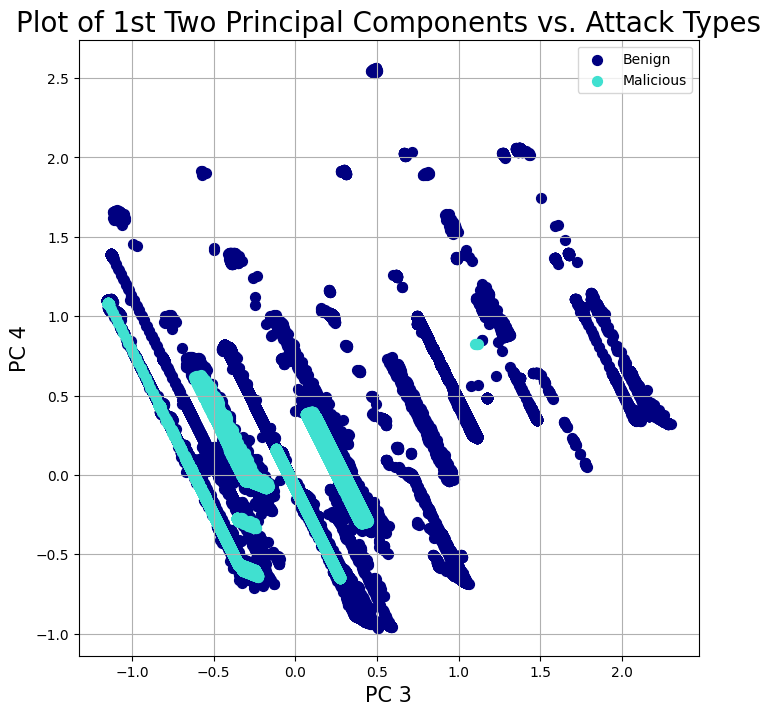

In [ ]:
binary_plot(pca_with_label)

In [ ]:
pca_with_atk_type = concat_column_for_plot(pca_data, "Attack Type")

In [ ]:
def multi_class_plot(pca_data):
  import matplotlib.pyplot as plt
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1)
  ax.set_xlabel('PC 1', fontsize = 15)
  ax.set_ylabel('PC 2', fontsize = 15)
  ax.set_title('Plot of 1st Two Principal Components vs. Attack Types', fontsize = 20)
  ATK_GRP = ['UDPFlood', 'HTTPFlood', 'SlowrateDos', 'TCPConnectScan', 'SYNScan', 'UDPScan', 'SYNFlood', 'ICMPFlood']
  colors = plt.cm.tab10.colors[:7]
  for ATK_GROUP, color in zip(ATK_GRP,colors):
      indicesToKeep = pca_data['Attack Type'] == ATK_GROUP
      ax.scatter(pca_data.loc[indicesToKeep, 'PC 3']
                , pca_data.loc[indicesToKeep, 'PC 4']
                , c = color
                , s = 50)
  ax.legend(ATK_GRP)
  ax.grid()

<ipython-input-118-4ec8ce834224>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(pca_data.loc[indicesToKeep, 'PC 3']


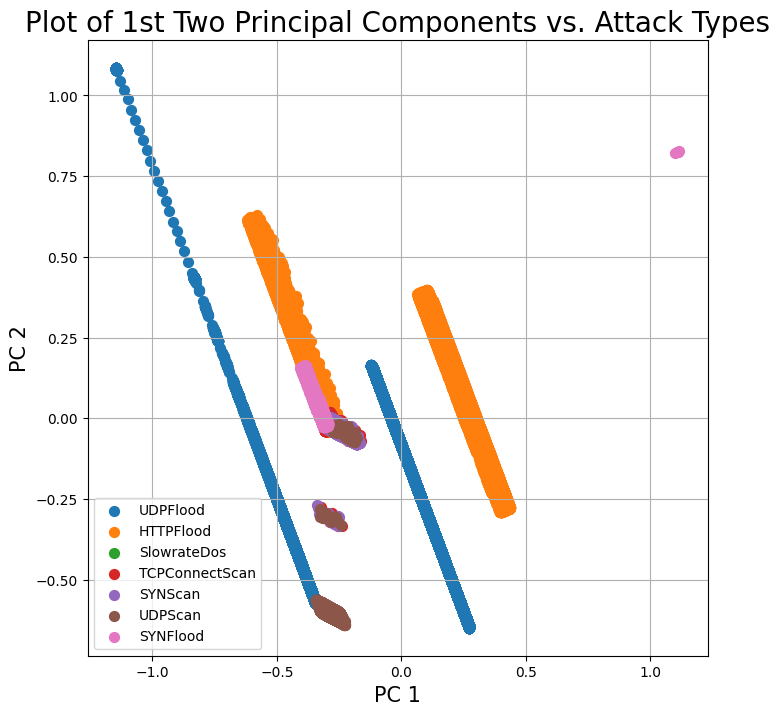

In [ ]:
multi_class_plot(pca_with_atk_type)

In [ ]:
def scree_plot(pca):
  import numpy as np
  import matplotlib
  import matplotlib.pyplot as plt
  PC_values = np.arange(pca.n_components_) + 1
  plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
  plt.title('Scree Plot')
  plt.xlabel('Principal Component')
  plt.ylabel('Proportion of Variance Explained')
  plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit_transform(normalised_data)

array([[ 1.16952504e+00,  1.01437263e+00, -3.14783296e-01, ...,
        -2.56781142e-02, -1.32505370e-02, -5.15665544e-03],
       [ 1.16952381e+00,  1.01437144e+00, -3.14785434e-01, ...,
        -2.56779222e-02, -1.32503139e-02, -5.15659332e-03],
       [-1.98817469e-01,  1.55899329e+00,  3.18095957e-01, ...,
        -8.19522327e-02, -7.97645103e-02,  9.30950590e-02],
       ...,
       [ 2.46262238e+00,  5.32055601e-01, -2.57696376e-01, ...,
         2.28598568e-01, -7.22595774e-02,  3.02266651e-02],
       [ 5.99587993e-01, -3.34203177e-01,  2.08020137e+00, ...,
         7.62871688e-01, -4.65606659e-01, -9.19505105e-03],
       [ 5.96062060e-01, -3.15942622e-01,  2.17899100e+00, ...,
        -4.67867026e-01,  1.29917857e-01, -3.89711398e-04]])

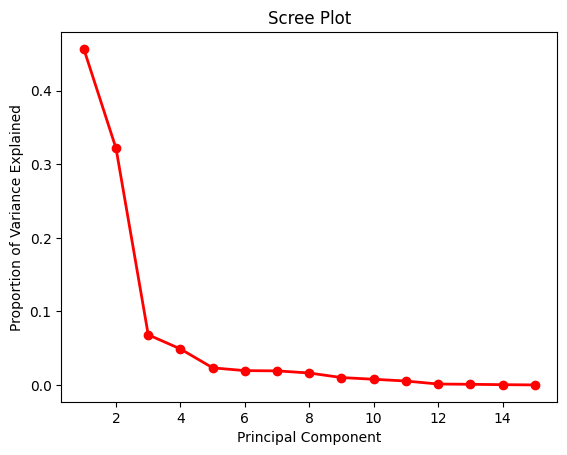

In [ ]:
scree_plot(pca)

In [ ]:
def print_cum_variance(pca):
  print("Proportion of Variance Explained : ", pca.explained_variance_ratio_)
  out_sum = np.cumsum(pca.explained_variance_ratio_)
  print ("Cumulative Prop. Variance Explained: ", out_sum)
  print(pca.explained_variance_)

In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12', 'PC 13', 'PC 14', 'PC 15'], index=X.columns)
loadings

In [ ]:
import numpy as np
print_cum_variance(pca)

Proportion of Variance Explained :  [4.56709049e-01 3.21568809e-01 6.82259216e-02 4.89693365e-02
 2.33268917e-02 1.95252871e-02 1.92014709e-02 1.62929489e-02
 1.01145061e-02 7.78817457e-03 5.39645422e-03 1.32578506e-03
 9.39771112e-04 4.56167941e-04 1.01581359e-04]
Cumulative Prop. Variance Explained:  [0.45670905 0.77827786 0.84650378 0.89547312 0.91880001 0.9383253
 0.95752677 0.97381972 0.98393422 0.9917224  0.99711885 0.99844464
 0.99938441 0.99984057 0.99994216]
[1.50779249e+00 1.06163659e+00 2.25243035e-01 1.61668787e-01
 7.70120764e-02 6.44613487e-02 6.33922926e-02 5.37900136e-02
 3.33923234e-02 2.57121052e-02 1.78160103e-02 4.37698521e-03
 3.10258759e-03 1.50600606e-03 3.35363641e-04]
